### Outliers

Let's say you want to conduct a hypothesis test on a new observation. 

You have historical data available, and you want to infer the null distribution to set up your confidence interval. 


You can alculate the mean and standard deviation. you can thus get the standard error and your good to go! No?

Not quite.

What if your data has errors? some of the data points are not representative of the population. If this skewes your mean and standard deviation, your confidence interval will be wrong.


#### Definition

Outliers are observations that are significantly different from other data points. They can be caused by measurement or input error, or just due to natural variance in the data. Outliers can have a large effect on the model, especially on regression models. It is important to detect and remove outliers before training a model.

#### Visual example

Let's say we have a data set with 8 observations drawn from the normal distribution with mean 0 and standard deviation 1. But two observations are drawn from the normal distribution with mean 10 and standard deviation 1. 

In the code above, change the mean of the outlier distribution to see the impact on the mean.



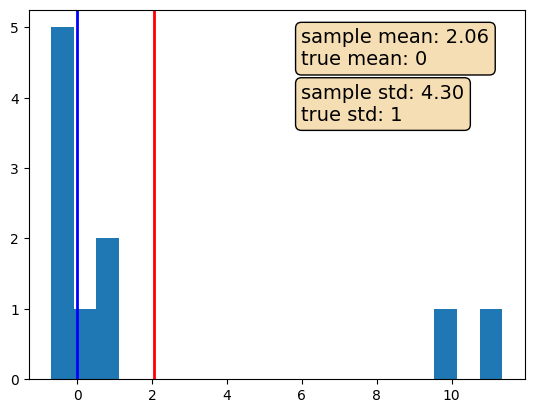

In [31]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

population_distribution= norm(loc=0, scale=1)
outlier_distribution= norm(loc=10, scale=1)
nsamples= 10
n_outliers= 2

sample_normal= population_distribution.rvs(size=nsamples - n_outliers)
sample_outlier= outlier_distribution.rvs(size=n_outliers)

sample= np.append(sample_normal, sample_outlier)

# plot the histogram of the 100 observations
plt.hist(sample, bins=20)

# add a vertical line at the mean of the 100 observations
plt.axvline(sample.mean(), color='r', linestyle='solid', linewidth=2)
# add a vertical line, the true mean, at 0
plt.axvline(0, color='b', linestyle='solid', linewidth=2)

## add horizontal text box for means
props = dict(boxstyle='round', facecolor='wheat', alpha=1)
plt.text(0.55, 0.95, "sample mean: {:.2f}\ntrue mean: 0".format(sample.mean()),
        transform=plt.gca().transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

## add a text box for the standard deviation
plt.text(0.55, 0.70, "sample std: {:.2f}\ntrue std: 1".format(sample.std()),
        transform=plt.gca().transAxes, fontsize=14,
        verticalalignment='baseline', bbox=props)


plt.show()


#### Impact 

Notice how the mean and standard deviation are skewed by the outlier.

This effect is dependent on:
- the number of outliers
- their distance from the population mean. 

The further away the outlier is, the larger the standard deviation will be. The direction of impact on the mean is dependent on the direction of the outlier.

#### Detection

There are many ways to detect outliers. One of the most common is confidence interval. 

Using your entire data set, decide on a confidence level. Then, set up your critical value and thus your *rejection region*.

Filter out the data points that fall inside of the rejection region.

#### Removal

We can remove outliers from the 
```python
import scipy.stats as norm
# given your mean and standard deviation
observed_mean= 0 
observed_std = 1
my_dist= norm(observed_mean, observed_std)
my_threshold_for_error= 0.0013

# set up lower and upper bounds
lower_bound = my_dist.ppf(my_threshold_for_error)
upper_bound = my_dist.ppf(1-my_threshold_for_error)

# filter out the outliers
my_data = [x for x in my_data if x > lower_bound and x < upper_bound]

# calculate the new mean and standard deviation
```

### Example

Let's try to remove the outliers in the data ser above

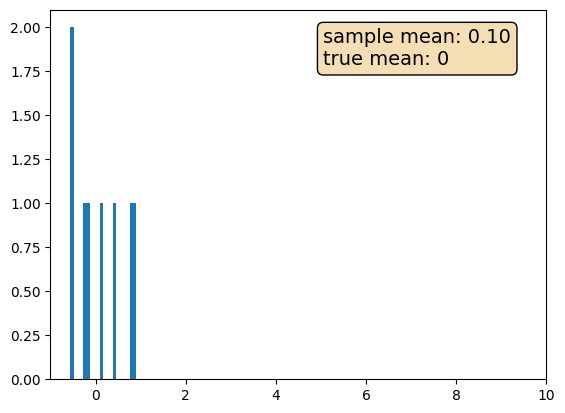

In [39]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

### Setting up the data
population_distribution= norm(loc=0, scale=1)
outlier_distribution= norm(loc=10, scale=1)
nsamples= 10
n_outliers= 2

sample_normal= population_distribution.rvs(size=nsamples - n_outliers)
sample_outlier= outlier_distribution.rvs(size=n_outliers)

sample= np.append(sample_normal, sample_outlier)

### Identifying the outliers

## 1. Calculate the mean and standard deviation of the sample
sample_mean= sample.mean()
sample_std= sample.std()
sample_dist= norm(loc=sample_mean, scale=sample_std)

## 2. setup your cutoff threshold and critical values
my_error_threshold= 0.05
lower_bound= sample_dist.ppf(my_error_threshold)
upper_bound= sample_dist.ppf(1 - my_error_threshold)


## 3. Filter the outliers from the sample
sample_filtered= sample[(sample > lower_bound) & (sample < upper_bound)]

## 4. Plot the filtered sample
plt.hist(sample_filtered, bins=20)

## add horizontal text box for means
props = dict(boxstyle='round', facecolor='wheat', alpha=1)
plt.text(0.55, 0.95, "sample mean: {:.2f}\ntrue mean: 0".format(sample_filtered.mean()),
        transform=plt.gca().transAxes, fontsize=14,
        verticalalignment='top', bbox=props)


plt.xlim(-1, 10)
plt.show()


#### Warning

There are many ways to detect outliers, and knowledge of your data is important.